In [33]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
import keras.utils as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epoch = 10

In [ ]:
#url = https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class/data

In [3]:
num_classes = 10
resnet_weight_path = 'imagenet'

my_model = Sequential()
my_model.add(ResNet50(include_top = False, pooling = 'avg', weights = resnet_weight_path))
my_model.add(Dense(512, activation = 'relu'))
my_model.add(Dense(num_classes, activation = 'softmax'))

my_model.layers[0].trainable = False
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [4]:
my_model.compile(optimizer = Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['Accuracy'])

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
train = 'G:\Kelas\Project\MY_data/train'
test = 'G:\Kelas\Project\MY_data/test'

In [6]:
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

train_generator = data_generator.flow_from_directory(
            train,
            target_size = (image_size, image_size),
            batch_size = 12,
            class_mode = 'categorical',
            subset = 'training')

test_generator = data_generator.flow_from_directory(
            test,
            target_size = (image_size, image_size),
            batch_size = 12,
            class_mode = 'categorical')

val_generator = val_data_generator.flow_from_directory(
            train,
            target_size = (image_size, image_size),
            batch_size = 12,
            class_mode = 'categorical',
            subset = 'validation')
classes = list(train_generator.class_indices.keys())

Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Found 460 images belonging to 10 classes.


In [7]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='G:\Kelas\Project\MY_data\model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

In [8]:
hasil = my_model.fit(
    train_generator,
    callbacks = callbacks_list,
    verbose = 1,
    validation_data = val_generator,
    epochs = epoch)

Epoch 1/10
192/192 [==============================] - ETA: 0s - loss: 0.5716 - Accuracy: 0.8288
Epoch 1: val_loss improved from inf to 0.06426, saving model to G:\Kelas\Project\MY_data\model.h5
192/192 [==============================] - 162s 825ms/step - loss: 0.5716 - Accuracy: 0.8288 - val_loss: 0.0643 - val_Accuracy: 0.9761
Epoch 2/10
192/192 [==============================] - ETA: 0s - loss: 0.1085 - Accuracy: 0.9639
Epoch 2: val_loss improved from 0.06426 to 0.03908, saving model to G:\Kelas\Project\MY_data\model.h5
192/192 [==============================] - 213s 1s/step - loss: 0.1085 - Accuracy: 0.9639 - val_loss: 0.0391 - val_Accuracy: 0.9891
Epoch 3/10
192/192 [==============================] - ETA: 0s - loss: 0.0509 - Accuracy: 0.9865
Epoch 3: val_loss improved from 0.03908 to 0.02351, saving model to G:\Kelas\Project\MY_data\model.h5
192/192 [==============================] - 210s 1s/step - loss: 0.0509 - Accuracy: 0.9865 - val_loss: 0.0235 - val_Accuracy: 0.9935
Epoch 4/10


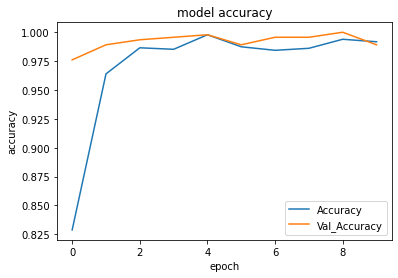

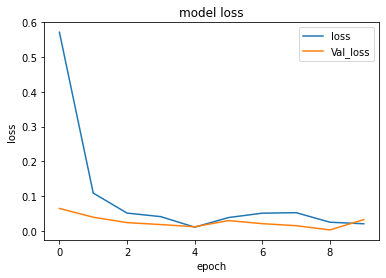

In [9]:
plt.plot(hasil.history['Accuracy'], label = 'Accuracy')
plt.plot(hasil.history['val_Accuracy'], label = 'Val_Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(hasil.history['loss'], label = 'loss')
plt.plot(hasil.history['val_loss'], label = 'Val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [10]:
test_hasil = my_model.evaluate(
    test_generator)

86/86 [==============================] - 95s 1s/step - loss: 4.2837 - Accuracy: 0.7093


In [11]:
#Dari Hasil Training. Terlihatan cukup bagus meskipun diawal terjadi gap nilai yang sangat jauh dan setelahnya kembali menjadi normal.
#Namun dari hasil evaluate. Accuracy yang didapatkan sebesar 70% namun terjadi anomali pada loss.

In [78]:
#load model yang sudah di train
model =load_model('G:\Kelas\Project\MY_data/model.h5')

In [139]:
#load 3 gambar yang akan digunakan untuk prediksi
img1_url = 'G:\Kelas\Project\MY_data\predict/3.jpeg'
img2_url = 'G:\Kelas\Project\MY_data\predict/00.jpeg'
img3_url = 'G:\Kelas\Project\MY_data\predict/659.jpeg'

In [133]:
label = ['apple', 'avocado', 'banana', 'cherry', 'kiwi', 'mango', 'orange', 'pineapple', 'stawberries', 'watermelon']

1/1 [==============================] - 0s 77ms/step


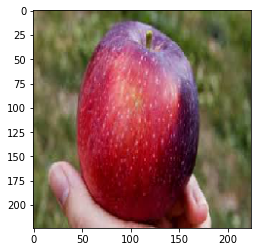

In [134]:
test_image1 = image.load_img(img1_url, target_size = (image_size, image_size))
plt.imshow(test_image1)

test_image1 = image.img_to_array(test_image1)

test_image1 = np.expand_dims(test_image1, axis = 0)

pred1 = model.predict(test_image1)

1/1 [==============================] - 0s 77ms/step


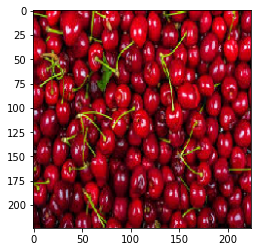

In [135]:
test_image2 = image.load_img(img2_url, target_size = (image_size, image_size))
plt.imshow(test_image2)

test_image2 = image.img_to_array(test_image2)

test_image2 = np.expand_dims(test_image2, axis = 0)

pred2 = model.predict(test_image2)

1/1 [==============================] - 0s 77ms/step


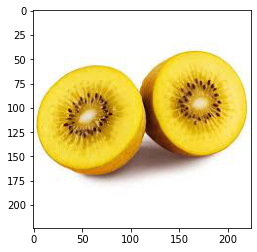

In [136]:
test_image3 = image.load_img(img3_url, target_size = (image_size, image_size))
plt.imshow(test_image3)

test_image3 = image.img_to_array(test_image3)

test_image3 = np.expand_dims(test_image3, axis = 0)

pred3 = model.predict(test_image3)

In [137]:
print(pred1)
print(pred2)
print(pred3)

[[9.6274269e-01 9.5709460e-08 5.9554144e-04 1.4103698e-07 3.5256167e-07
  4.7214000e-04 8.3025618e-08 1.9024887e-10 7.4091156e-07 3.6188252e-02]]
[[1.4955464e-09 9.6554301e-12 1.7005993e-08 9.9999988e-01 6.8356914e-14
  4.4543620e-17 3.6535089e-12 9.7286849e-13 4.2265615e-08 3.3034546e-08]]
[[1.0835927e-11 1.0136439e-11 2.0355185e-11 1.0280992e-15 9.9999785e-01
  5.1164764e-17 2.1473370e-06 1.1879586e-09 3.1905513e-12 1.2921076e-08]]


In [138]:
pred1_class = label[np.argmax(pred1[0])]
confidence1 = np.max(pred[0])
pred2_class = label[np.argmax(pred2[0])]
confidence2 = np.max(pred[0])
pred3_class = label[np.argmax(pred3[0])]
confidence3 = np.max(pred[0])

print(pred1_class, confidence1)
print(pred2_class, confidence2)
print(pred3_class, confidence3)

apple 0.88578796
cherry 0.88578796
kiwi 0.88578796


In [ ]:
#dari 3 gambar yang digunakan untuk prediksi, menghasilkan 3 gambar yang sudah sesuai.